In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(str(len(x_train)) + ", " + str(len(x_test)))

60000, 10000


In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_train = x_train.astype('float32')/255

In [0]:
x_test = x_test.reshape(10000,28,28,1)
x_test = x_test.astype('float32')/255

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [0]:
model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.Conv2D(64,(3,3), activation = tf.nn.relu, input_shape = (28,28,1)))
model2.add(tf.keras.layers.MaxPooling2D((2,2)))
model2.add(tf.keras.layers.Conv2D(128,(3,3), activation = tf.nn.relu))
model2.add(tf.keras.layers.MaxPooling2D((2,2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model2.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
model2.fit(x_train, y_train, epochs = 4, batch_size = 100, verbose = 1)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 128s 2ms/sample - loss: 0.1426 - acc: 0.9559
Epoch 2/4
60000/60000 [==============================] - 126s 2ms/sample - loss: 0.0419 - acc: 0.9872
Epoch 3/4
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.0279 - acc: 0.9909
Epoch 4/4
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.0193 - acc: 0.9940


In [0]:
test_loss, test_accuracy = model2.evaluate(x_test,y_test)
print("Loss: " + str(test_loss) + "\nAccuracy: " + str(test_accuracy))

10000/10000 [==============================] - 6s 601us/sample - loss: 0.0358 - acc: 0.9895
Loss: 0.035772819984583475
Accuracy: 0.9895


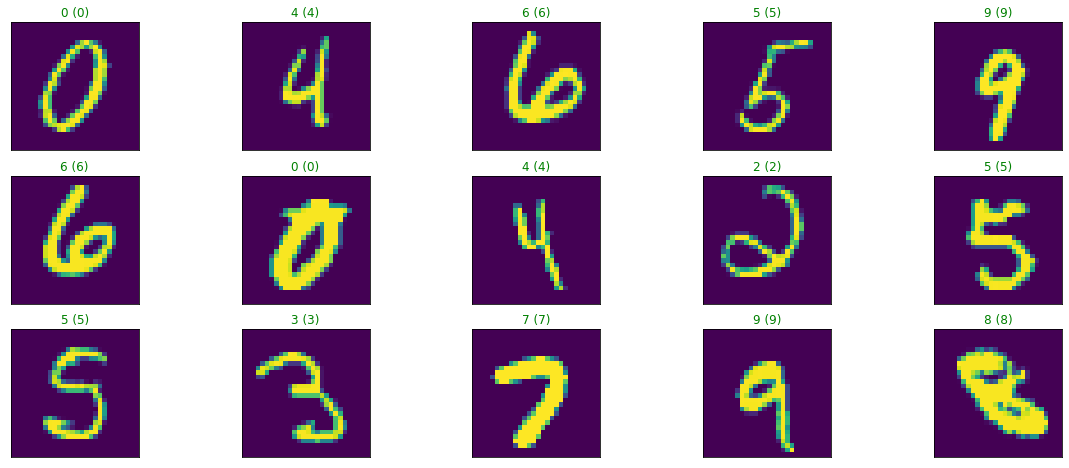

In [0]:
y_hat = model2.predict(x_test)
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_digit = np.argmax(y_hat[index])
    true_digit = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(predict_digit,true_digit),
                                color=("green" if predict_digit == true_digit else "red"))